# HW3 Problem 6 #

In Table 1 of the posted paper of Fleys, Simon, and Marquaire, there are two competing unimolecular reactions of ethane (Reaction #33 in the forward direction, and the reverse of Reaction 5).

(33) C2H6(+M)=C2H4+H2

5(reverse)  C2H6(+M) = 2 CH3 (+M)      
 

Explicitly compare these two rate coefficients for the decomposition of ethane. Which one do you expect to have a higher A factor, why? According to the Fleys et al. model, which one has a higher A factor? Do you agree with Fleys et al. or not

In [37]:
# add appropriate modules
import pandas as pd
import numpy as np
import time
import cantera as ct
from matplotlib import pyplot as plt
import csv
import math
from operator import add

from IPython.display import Image

In [38]:
#Eb forward to Eb reverse: calculate 

#deltaHrxn at 0K
# C=C infer 10kcal/mol at 0K from chart on RMG.MIT.edu
# CH3 infer 32 kcal/mol at 0K

Hethane = 10*4184 # kcal/mol to j/mol
Hch3 = 32*4184
dH_rxn5 = 2*Hch3-Hethane

Eb_rxn5 = dH_rxn5
print(Eb_rxn5)

225936


In [39]:
# from paper, calculate reverse rate from Keq
# Equilibrium calcs 
cti_file = '/Users/blais.ch/_01_code/MIT_Kinetics_HW/assignments/HW3/P6/Thermo.cti'
gas = ct.Solution(cti_file)
# Reactor conditions
reactorTemperature = 973.15  # Kelvin, bottom of range used in paper (700C)
reactorPressure = ct.one_atm 
concentrations = {'C2H4': 0.5, 'CH3': 0.5}
gas.TPX = reactorTemperature, reactorPressure, concentrations


print(gas.species_names)
Keq = math.exp(gas.standard_gibbs_RT[2]-2*gas.standard_gibbs_RT[1])
print(Keq)


CM3_M3 = 1/(100**3) # conversion CM3 to M3
kr_rxn5 = (3.6*10**(13))*CM3_M3 #Kreverse in M3/mol/s

kf_rxn5 = Keq*kr_rxn5

Ea_rxn33 = 67.4*4184 #I am guessing this is kcal/mol
kf_rxn33 = (2.3*10**17)*math.exp(-Ea_rxn33/(8.314*973.15))


A_rxn33 = 2.3*10**17
A_rxn5 = kf_rxn5/math.exp(-Eb_rxn5/(8.3145*973.15))

print('Frequency factor reaction 33 :', A_rxn33, 'm^3/mol/s')
print('Frequency Factor Reaction 5  :',A_rxn5, 'm^3/mol/s\n')

print('Ea reaction 33               :',Ea_rxn33, 'J/mol')
print('Eb Reaction 5                :',Eb_rxn5, 'J/mol\n')

print('Rate Coefficient Reaction 33 :',kf_rxn33, 'mol/m^3/s')
print('Rate Coefficient Reaction 5  :',kf_rxn5, 'mol/m^3/s' )

['He', 'CH3', 'C2H4']
0.0005204251335371911
Frequency factor reaction 33 : 2.2999999999999997e+17 m^3/mol/s
Frequency Factor Reaction 5  : 2.5099968877629336e+16 m^3/mol/s

Ea reaction 33               : 282001.60000000003 J/mol
Eb Reaction 5                : 225936 J/mol

Rate Coefficient Reaction 33 : 167.69088285380178 mol/m^3/s
Rate Coefficient Reaction 5  : 18735.304807338878 mol/m^3/s


This is the opposite of what I expected. Reaction 33 will likely have a 4-membered ring TS, which means that the TS will have an overall lower deltaentropyfor the transition state than reaction 5. It is possible I made a unit conversion error (or that my assumption that the activation energy for reaction 33 was in kcal/mol was incorrect). Some other assumptions that could be faulty are I imoplicitly said Eb = Ea = the change of enthalpy in reaction (since the reverse Ea was 0 for reaction 5). 

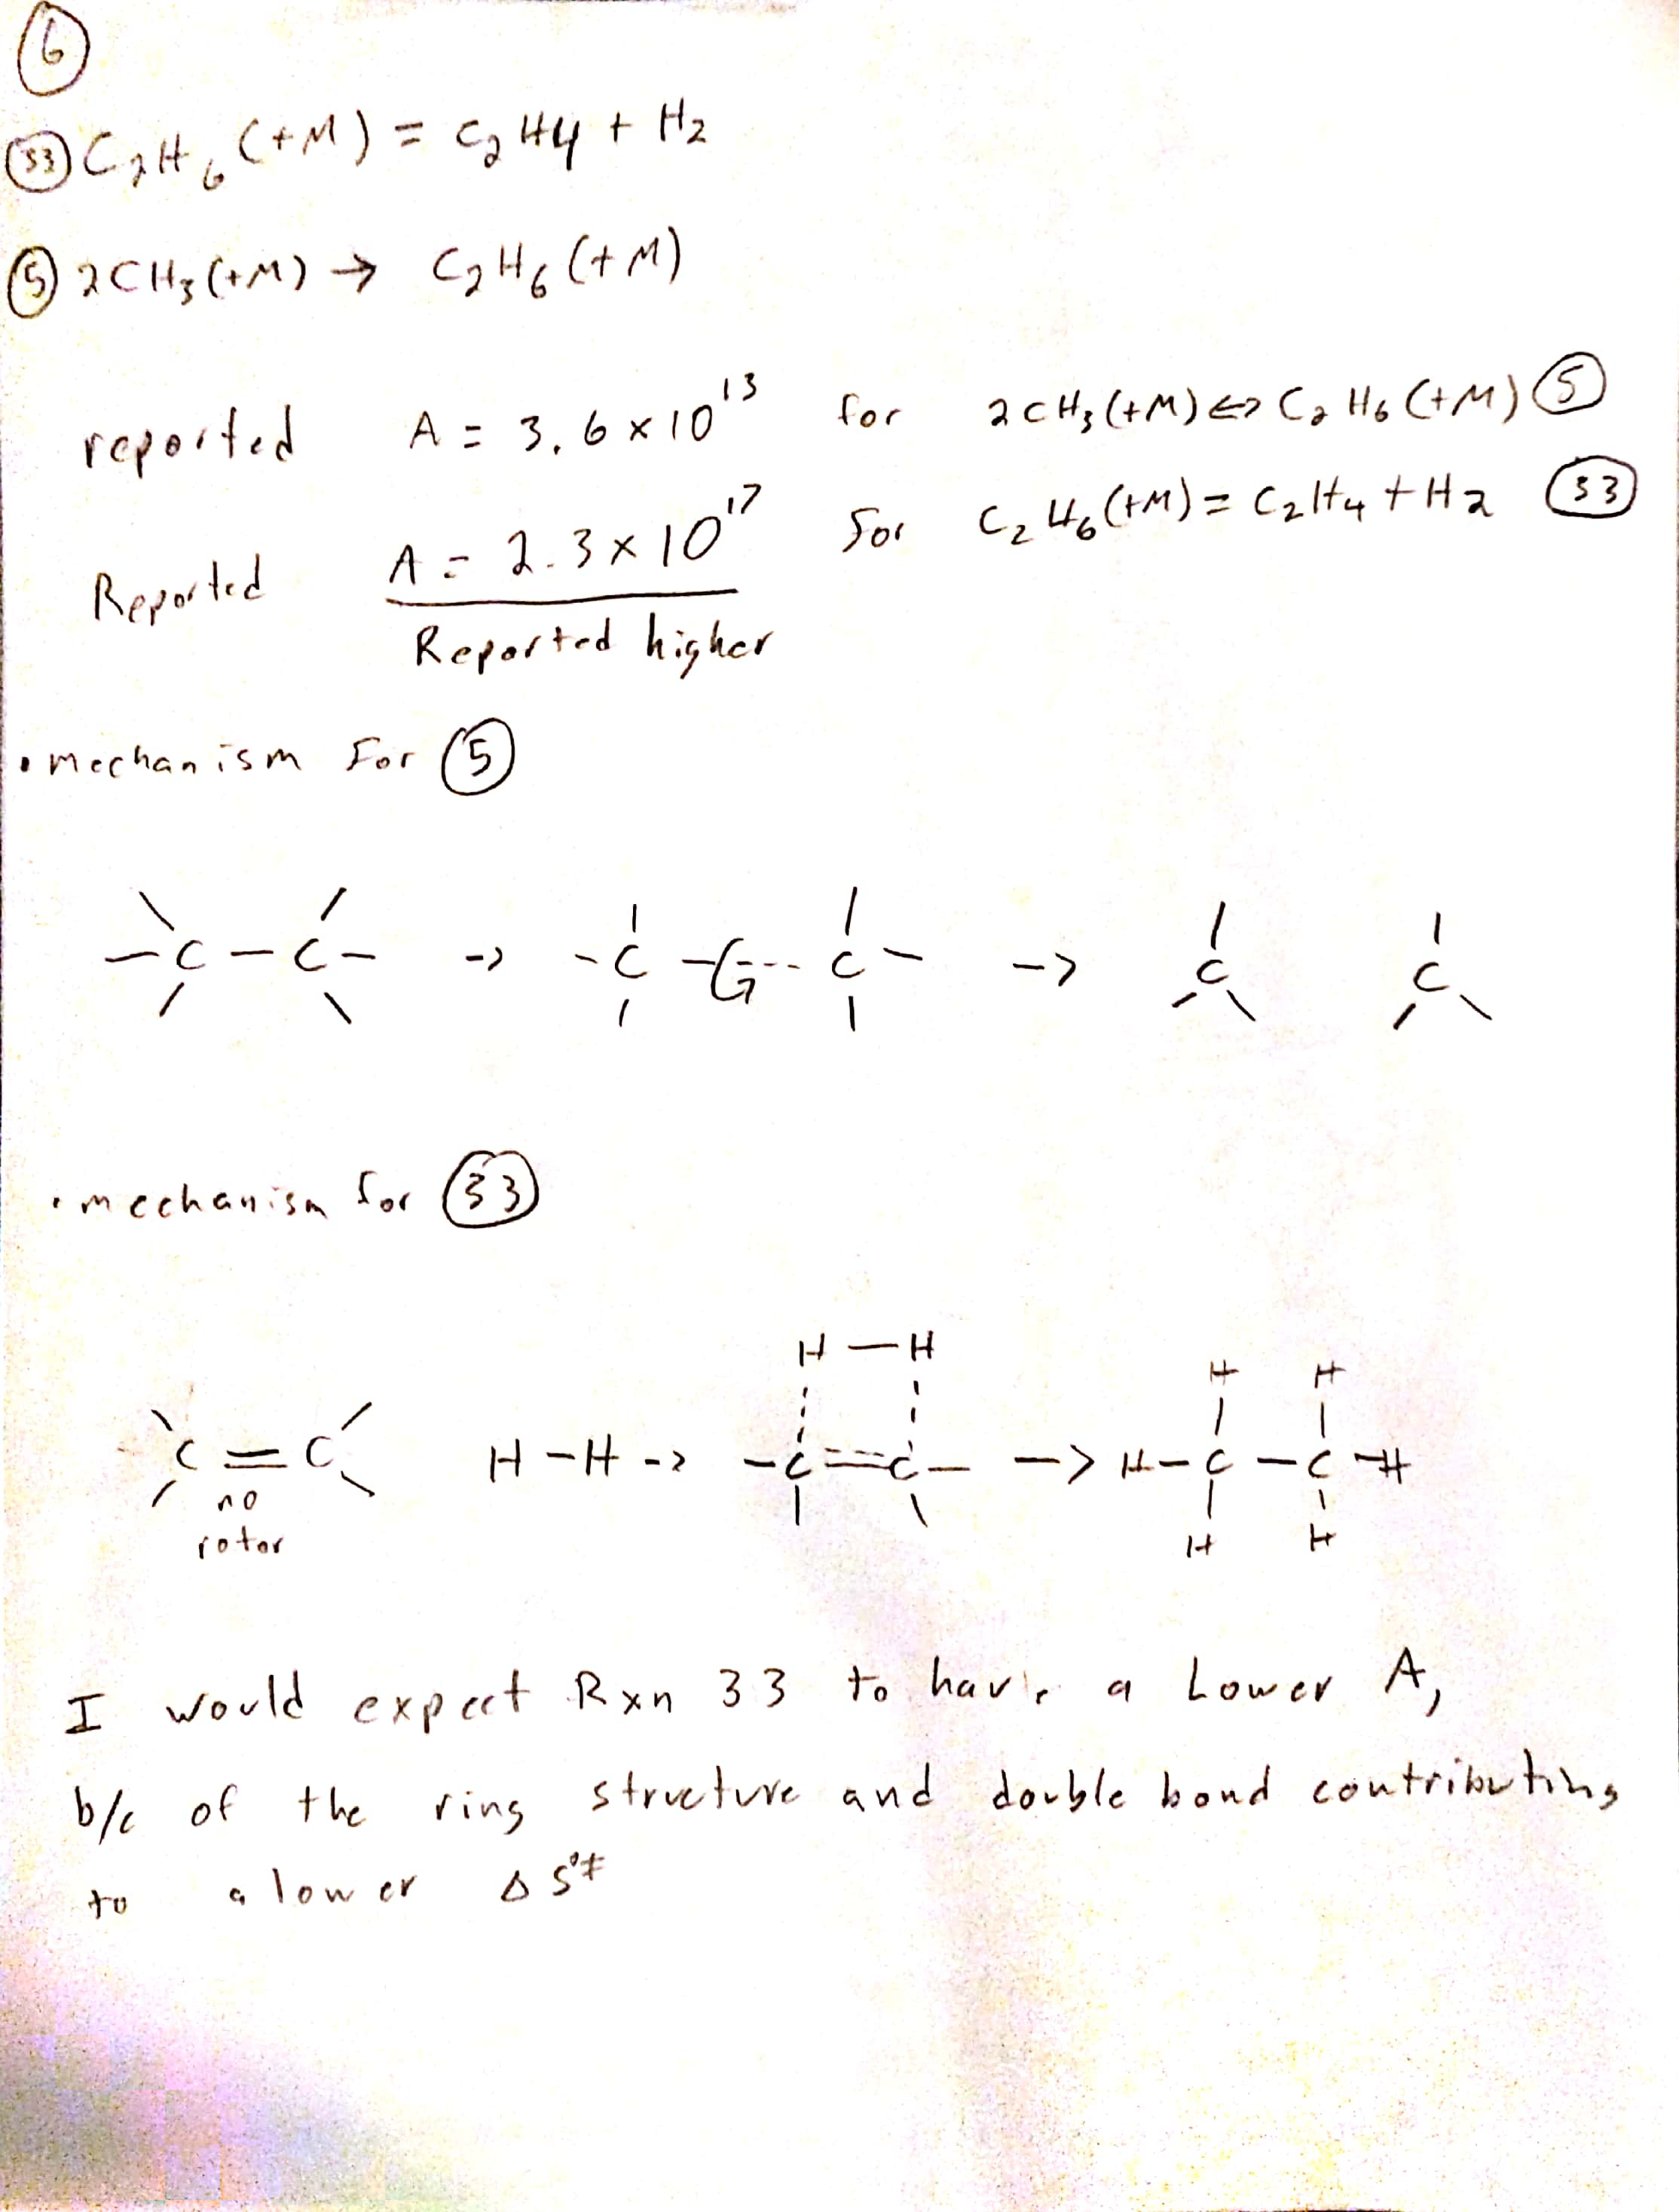

In [40]:
Image(filename='../images/Problem6_1.png')